In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# ing the dataset-
df = pd.read_csv('/content/drive/MyDrive/indian-ev-data.csv')

In [37]:
df.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


In [38]:
# Dropping the missing values-
df_cleaned = df.dropna().reset_index(drop=True)

In [39]:
# Basic Information-
print("Dataframe Shape:", df_cleaned.shape)
print("\nDataframe Info:")
print(df_cleaned.info())

Dataframe Shape: (49, 11)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      49 non-null     int64  
 1   Model                   49 non-null     object 
 2   Manufacturer            49 non-null     object 
 3   Vehicle Type            49 non-null     object 
 4   Battery Capacity (kWh)  49 non-null     float64
 5   Range per Charge (km)   49 non-null     int64  
 6   Charging Time           49 non-null     float64
 7   Price                   49 non-null     float64
 8   Power (HP or kW)        49 non-null     float64
 9   Top Speed (km/h)        49 non-null     float64
 10  Year of Manufacture     49 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.3+ KB
None


In [40]:
print("\nDataframe Describe:")
print(df_cleaned.describe(include='all'))


Dataframe Describe:
              id                Model  Manufacturer Vehicle Type  \
count   49.00000                   49            49           49   
unique       NaN                   21            10            2   
top          NaN  Okinawa iPraise Pro  Ather Energy      Scooter   
freq         NaN                    6             8           38   
mean    25.00000                  NaN           NaN          NaN   
std     14.28869                  NaN           NaN          NaN   
min      1.00000                  NaN           NaN          NaN   
25%     13.00000                  NaN           NaN          NaN   
50%     25.00000                  NaN           NaN          NaN   
75%     37.00000                  NaN           NaN          NaN   
max     49.00000                  NaN           NaN          NaN   

        Battery Capacity (kWh)  Range per Charge (km)  Charging Time  \
count                49.000000              49.000000      49.000000   
unique            

In [41]:
# Checking for Duplicates-
print("\nNumber of Duplicated Rows:", df_cleaned.duplicated().sum())


Number of Duplicated Rows: 0


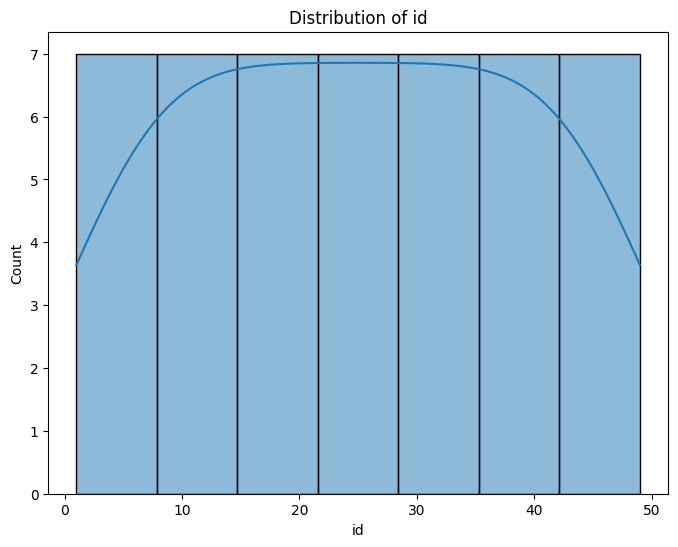

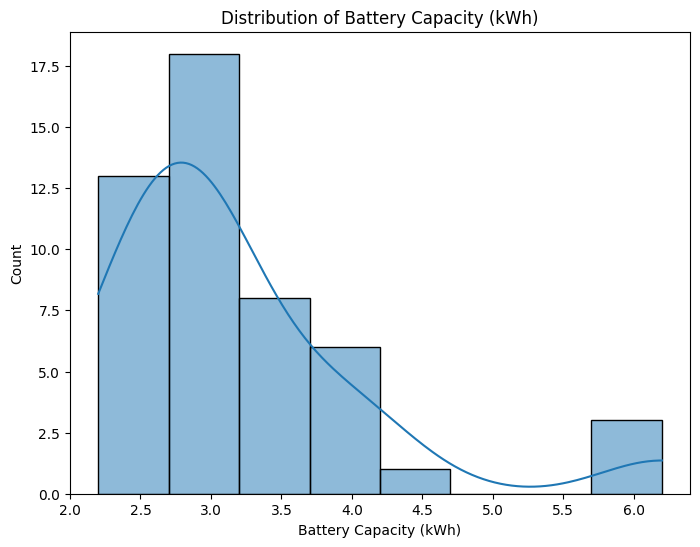

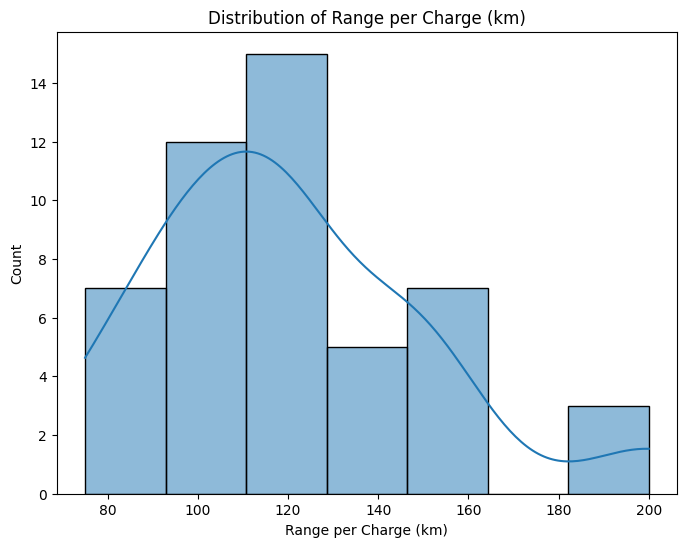

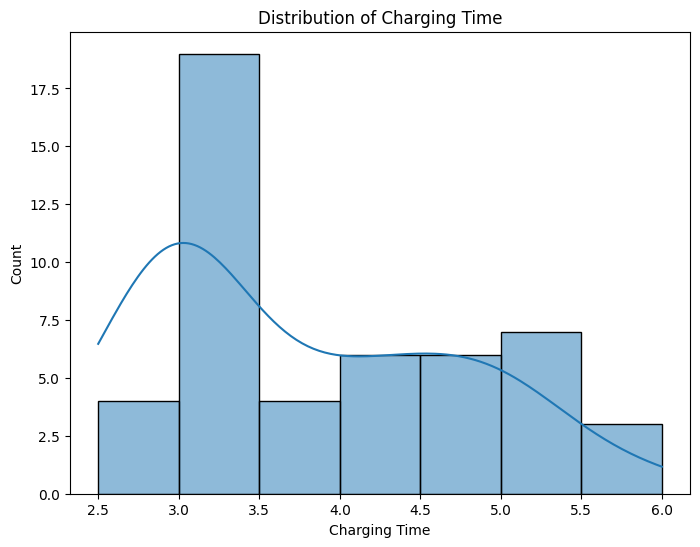

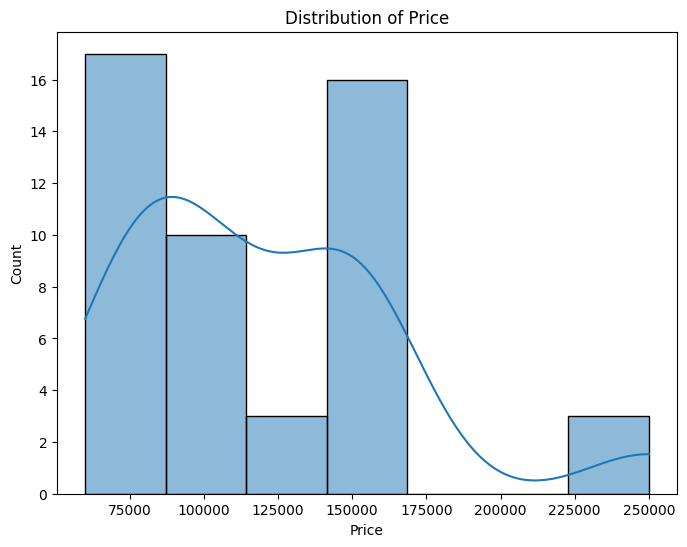

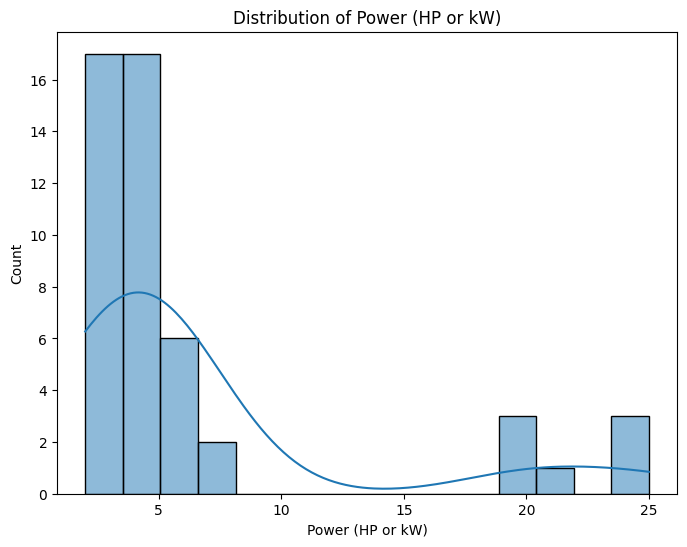

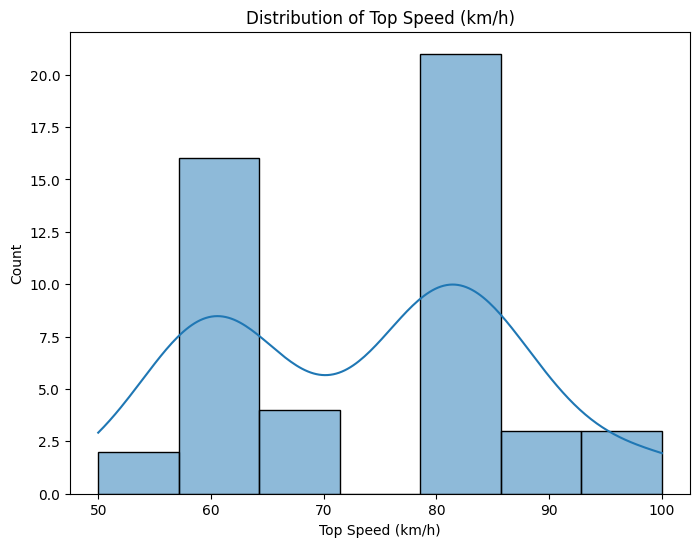

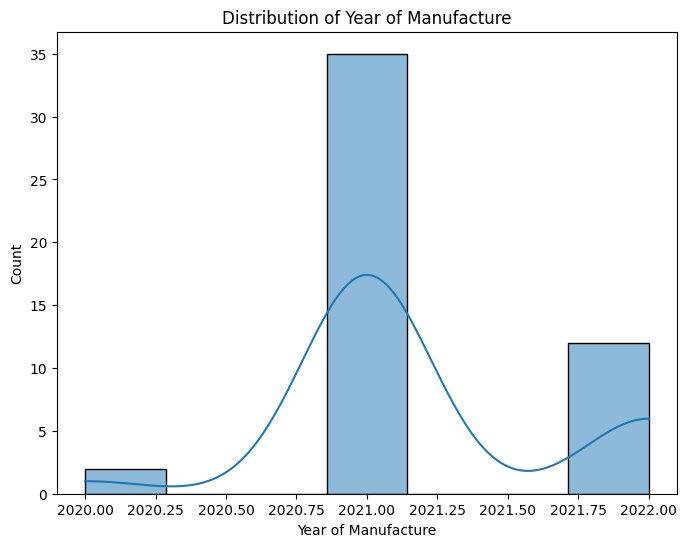

In [42]:
# Visualizing the distribution of numerical features-
numerical_features = df_cleaned.select_dtypes(include=np.number).columns
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(df_cleaned[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show()

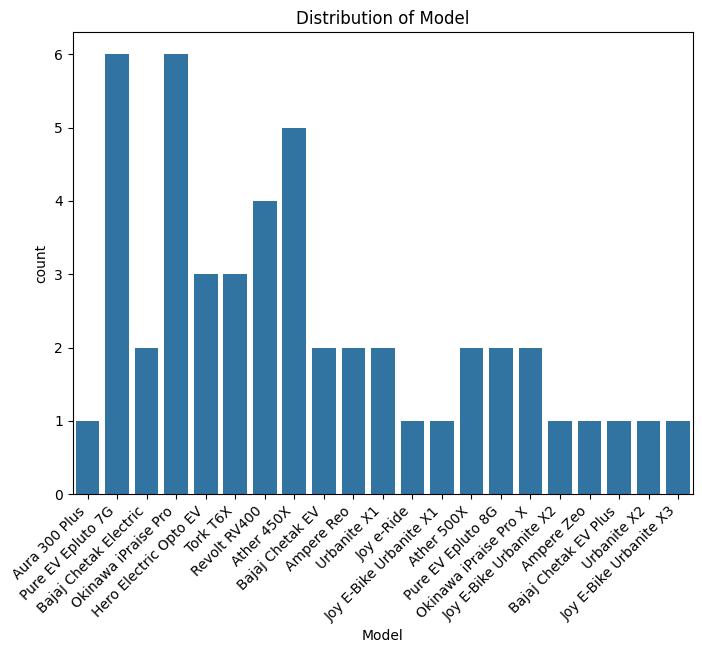

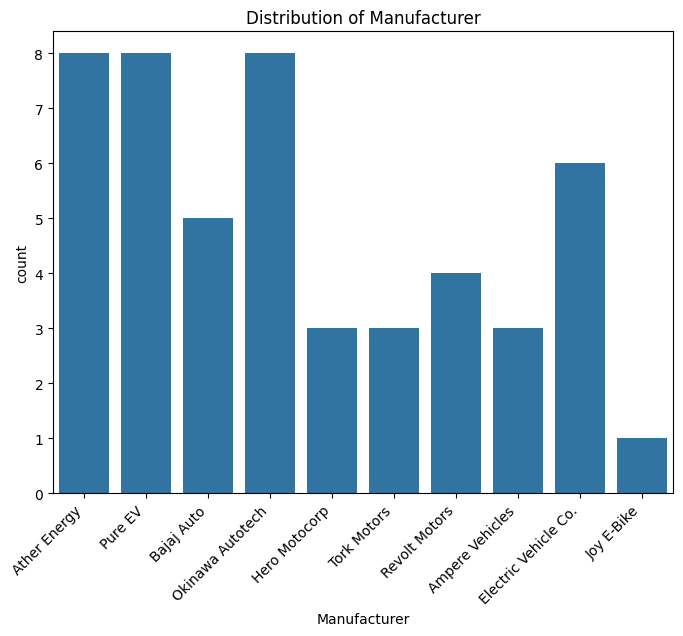

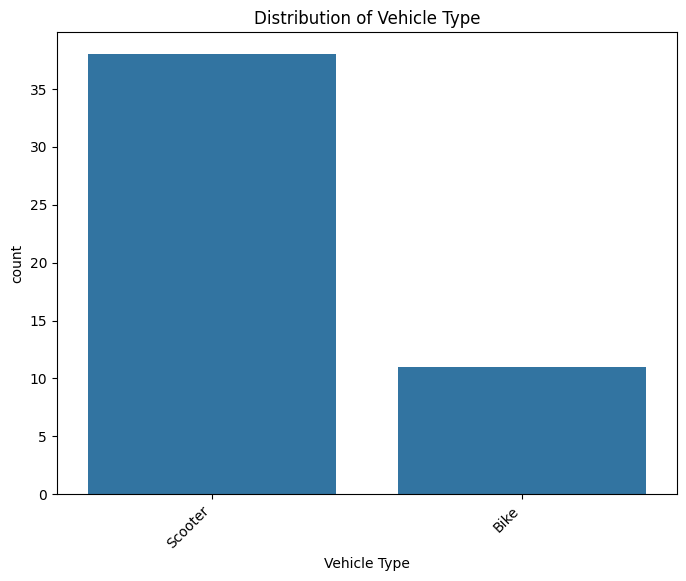

In [43]:
# Visualizing the distribution of categorical features-
categorical_features = df_cleaned.select_dtypes(include=['object']).columns
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=df_cleaned[feature])
  plt.title(f'Distribution of {feature}')
  plt.xticks(rotation=45, ha='right')
  plt.show()

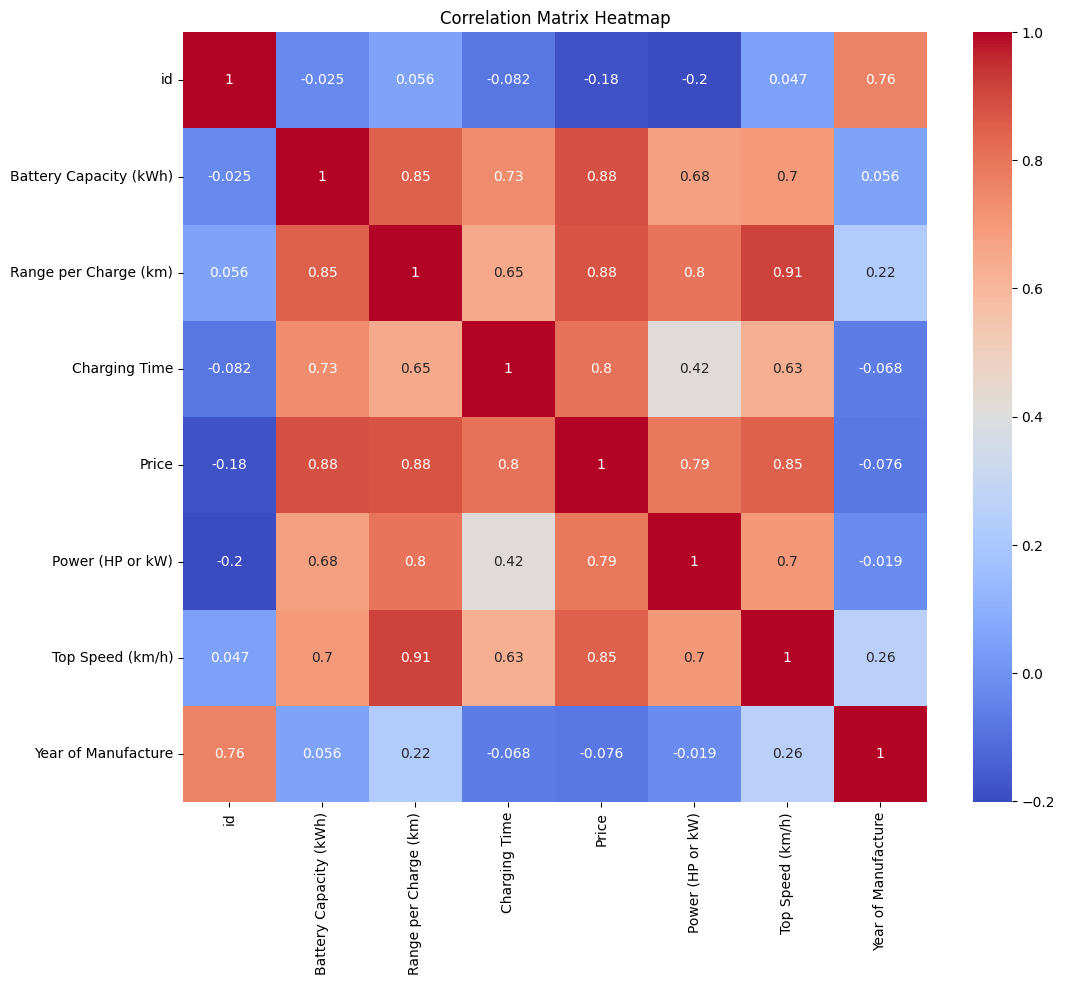

In [44]:
# Correlation matrix heatmap-
plt.figure(figsize=(12, 10))
correlation_matrix = df_cleaned.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [45]:
# Importing ML Techniques-
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [46]:
# Preprocessing-
# Encoding categorical features-
le = LabelEncoder()
for col in df_cleaned.select_dtypes(include='object').columns:
  df_cleaned[col] = le.fit_transform(df_cleaned[col])

In [47]:
# Scaling numerical features-
scaler = StandardScaler()
numerical_features = df_cleaned.select_dtypes(include=np.number).columns
df_scaled = scaler.fit_transform(df_cleaned[numerical_features])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)

In [48]:
# PCA for dimensionality reduction-
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

In [49]:
# K-Means Clustering -
# Determine the optimal number of clusters using the Elbow method
inertia = []
range_values = range(1, 11)
for i in range_values:
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
  kmeans.fit(df_pca)
  inertia.append(kmeans.inertia_)

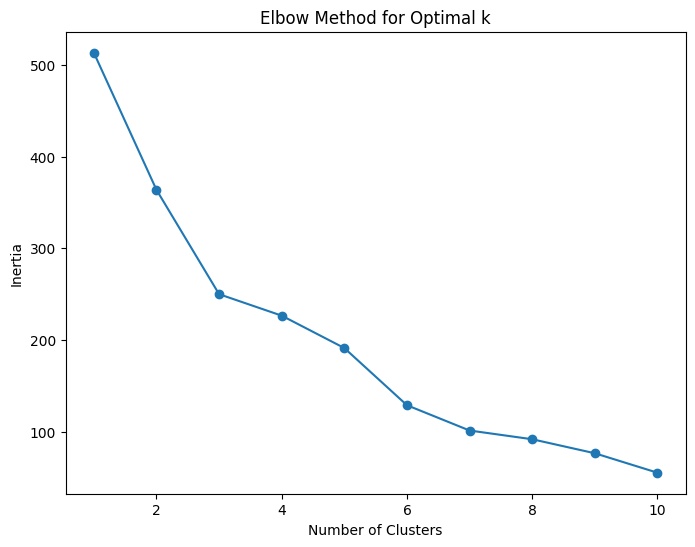

In [50]:
# Plotting the Elbow method graph-
plt.figure(figsize=(8, 6))
plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [51]:
# Silhouette analysis for K-Means-
silhouette_scores_kmeans = []
for i in range(2, 11):  # Testing from 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    silhouette_scores_kmeans.append(score)
    print(f"Silhouette Score for {i} clusters: {score}")

Silhouette Score for 2 clusters: 0.5122750073154512
Silhouette Score for 3 clusters: 0.3547979081340821
Silhouette Score for 4 clusters: 0.3539139753251225
Silhouette Score for 5 clusters: 0.35420870351475575
Silhouette Score for 6 clusters: 0.44464697426723326
Silhouette Score for 7 clusters: 0.43620006298692826
Silhouette Score for 8 clusters: 0.3698453976712114
Silhouette Score for 9 clusters: 0.41862215444188877
Silhouette Score for 10 clusters: 0.45679678547271085


In [52]:
# Finding the optimal number of clusters with the highest silhouette score-
optimal_k_kmeans = silhouette_scores_kmeans.index(max(silhouette_scores_kmeans)) + 2
print(f"\nOptimal number of clusters (K-Means) based on highest silhouette score: {optimal_k_kmeans}")
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k_kmeans, init='k-means++', random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(df_pca)


Optimal number of clusters (K-Means) based on highest silhouette score: 2


In [53]:
# Adding cluster labels to the dataframe-
df_cleaned['KMeans_Cluster'] = kmeans_labels

In [54]:
# Hierarchical Clustering (Agglomerative) -
# Silhouette analysis for Agglomerative Clustering-
silhouette_scores_agg = []
for i in range(2, 11):  # Testing from 2 to 10 clusters
    agg = AgglomerativeClustering(n_clusters=i)
    labels = agg.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    silhouette_scores_agg.append(score)
    print(f"Silhouette Score for {i} clusters: {score}")

Silhouette Score for 2 clusters: 0.445812434724134
Silhouette Score for 3 clusters: 0.3363910697758696
Silhouette Score for 4 clusters: 0.3773463283197635
Silhouette Score for 5 clusters: 0.40587918845778975
Silhouette Score for 6 clusters: 0.45135418756455103
Silhouette Score for 7 clusters: 0.4808520399062817
Silhouette Score for 8 clusters: 0.5186740298629879
Silhouette Score for 9 clusters: 0.5169725700246008
Silhouette Score for 10 clusters: 0.5444228405202344


In [55]:
# Finding the optimal number of clusters with the highest silhouette score-
optimal_k_agg = silhouette_scores_agg.index(max(silhouette_scores_agg)) + 2
print(f"\nOptimal number of clusters (Agglomerative) based on highest silhouette score: {optimal_k_agg}")


Optimal number of clusters (Agglomerative) based on highest silhouette score: 10


In [56]:
# Applyying Agglomerative Clustering-
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k_agg)
agg_labels = agg_clustering.fit_predict(df_pca)

In [57]:
# Adding cluster labels to the dataframe-
df_cleaned['Agglomerative_Cluster'] = agg_labels

In [58]:
# Gaussian Mixture Model -
# Silhouette analysis for GMM-
silhouette_scores_gmm = []
for i in range(2, 11):
  gmm = GaussianMixture(n_components=i, random_state=42)
  labels = gmm.fit_predict(df_pca)
  score = silhouette_score(df_pca, labels)
  silhouette_scores_gmm.append(score)
  print(f"Silhouette Score for {i} clusters: {score}")

Silhouette Score for 2 clusters: 0.5122750073154512
Silhouette Score for 3 clusters: 0.3547979081340821
Silhouette Score for 4 clusters: 0.3539139753251225
Silhouette Score for 5 clusters: 0.35420870351475575
Silhouette Score for 6 clusters: 0.44464697426723326
Silhouette Score for 7 clusters: 0.43620006298692826
Silhouette Score for 8 clusters: 0.374000578901345
Silhouette Score for 9 clusters: 0.4228004151457933
Silhouette Score for 10 clusters: 0.47074858656356144


In [59]:
optimal_k_gmm = silhouette_scores_gmm.index(max(silhouette_scores_gmm)) + 2
print(f"\nOptimal number of clusters (GMM) based on highest silhouette score: {optimal_k_gmm}")


Optimal number of clusters (GMM) based on highest silhouette score: 2


In [60]:
gmm = GaussianMixture(n_components=optimal_k_gmm, random_state=42)
gmm_labels = gmm.fit_predict(df_pca)
df_cleaned['GMM_Cluster'] = gmm_labels

In [61]:
# DBSCAN Clustering-
# Using default parameters for demonstration-
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(df_pca)
df_cleaned['DBSCAN_Cluster'] = dbscan_labels
print(f"\nNumber of clusters in DBSCAN: {len(set(dbscan_labels))}")


Number of clusters in DBSCAN: 1


In [62]:
# Cluster Analysis -
print("\nK-Means Cluster Analysis:")
print(df_cleaned.groupby('KMeans_Cluster').mean())
print("\nAgglomerative Cluster Analysis:")
print(df_cleaned.groupby('Agglomerative_Cluster').mean())
print("\nGMM Cluster Analysis:")
print(df_cleaned.groupby('GMM_Cluster').mean())
print("\nDBSCAN Cluster Analysis:")
print(df_cleaned.groupby('DBSCAN_Cluster').mean())


K-Means Cluster Analysis:
                       id     Model  Manufacturer  Vehicle Type  \
KMeans_Cluster                                                    
0               12.666667  18.00000      9.000000      0.000000   
1               25.804348  10.23913      4.108696      0.826087   

                Battery Capacity (kWh)  Range per Charge (km)  Charging Time  \
KMeans_Cluster                                                                 
0                             6.200000             200.000000       5.000000   
1                             2.984783             114.956522       3.673913   

                       Price  Power (HP or kW)  Top Speed (km/h)  \
KMeans_Cluster                                                     
0               250000.00000         25.000000        100.000000   
1               112021.73913          5.608696         72.065217   

                Year of Manufacture  Agglomerative_Cluster  GMM_Cluster  \
KMeans_Cluster                     

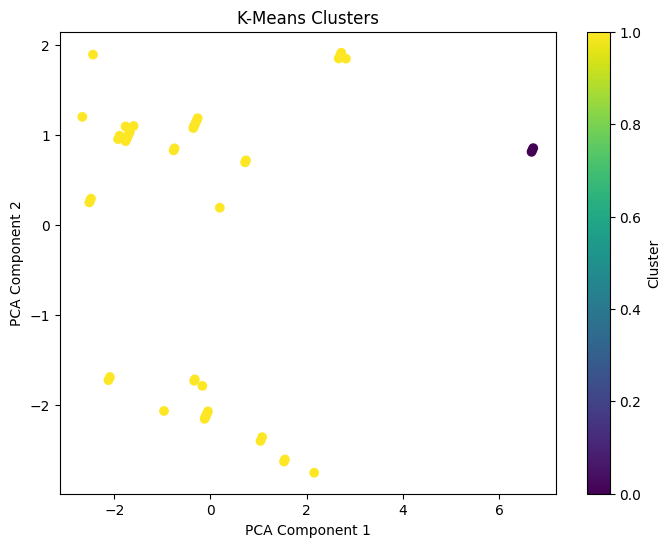

In [63]:
# Visualization of clusters -
# K-Means Cluster Visualization-
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[0], df_pca[1], c=df_cleaned['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

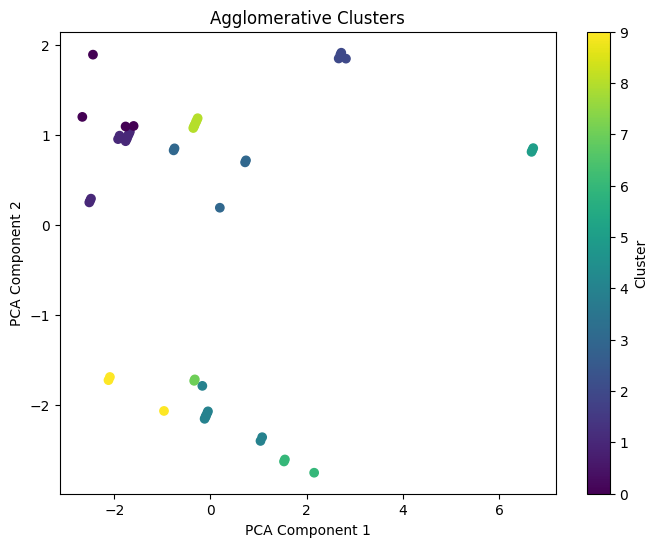

In [64]:
# Agglomerative Cluster Visualization-
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[0], df_pca[1], c=df_cleaned['Agglomerative_Cluster'], cmap='viridis')
plt.title('Agglomerative Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

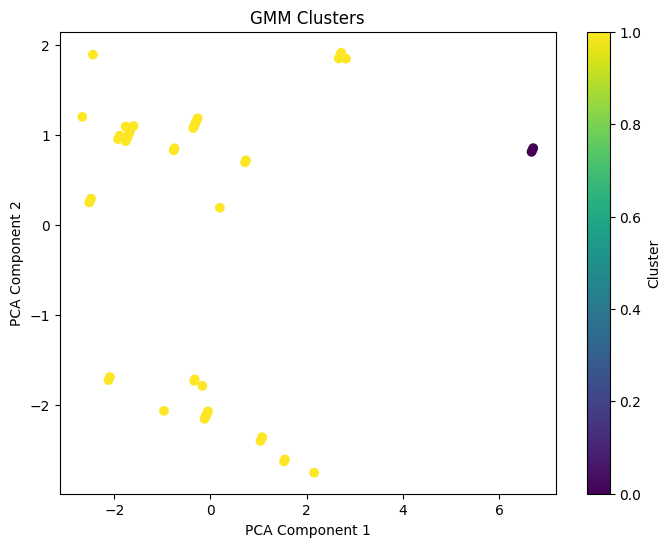

In [65]:
# GMM Cluster Visualization-
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[0], df_pca[1], c=df_cleaned['GMM_Cluster'], cmap='viridis')
plt.title('GMM Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

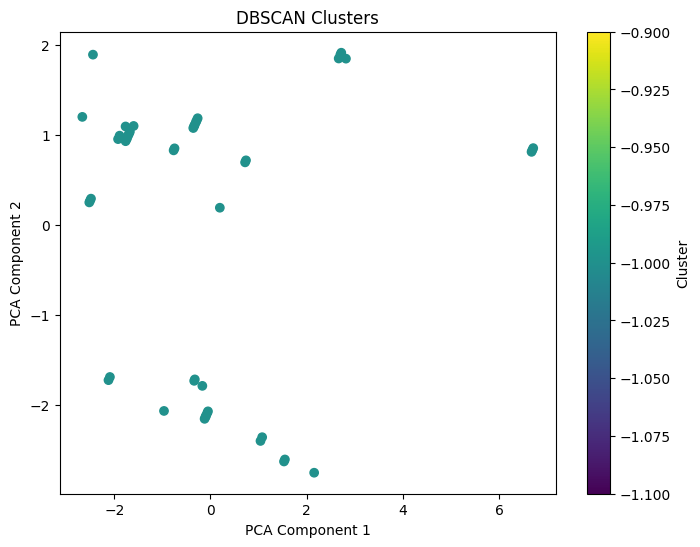

In [66]:
# DBSCAN Cluster Visualization-
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[0], df_pca[1], c=df_cleaned['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()